In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci


In [3]:
house = pd.read_csv('/Users/tom/Downloads/train.csv')

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
temp = house.isnull().sum()

In [7]:
temp[temp > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
house = house.fillna(house.mean())

In [9]:
temp = house.isnull().sum()

In [10]:
house = house.fillna('None')

In [11]:
temp = house.isnull().sum()

In [12]:
temp[temp > 0]

Series([], dtype: int64)

In [13]:
corr = house.corr()['SalePrice']

In [14]:
corr[corr > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [15]:
corr[corr < -0.5]

Series([], Name: SalePrice, dtype: float64)

<AxesSubplot:>

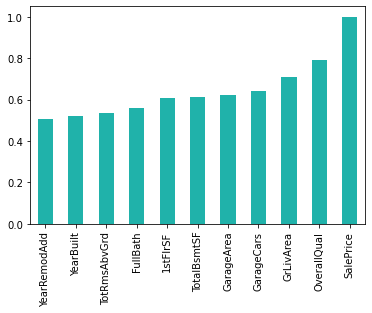

In [16]:
corr[corr > 0.5].sort_values().plot.bar(color = 'lightseagreen')

<AxesSubplot:xlabel='OverallQual'>

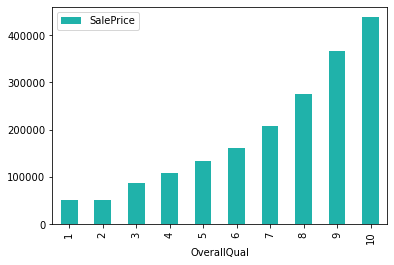

In [17]:
house[['OverallQual', 'SalePrice']].groupby(['OverallQual']).mean().plot.bar(color = 'lightseagreen')

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use strippl

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

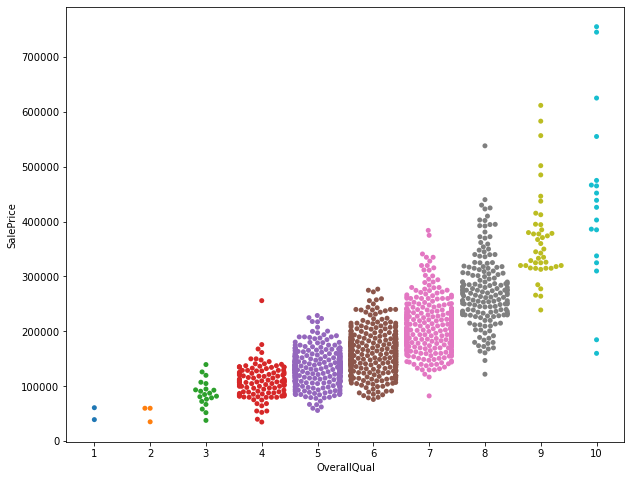

In [18]:
fig = plt.figure(figsize = (10,8))
sns.swarmplot('OverallQual', 'SalePrice', data = house)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

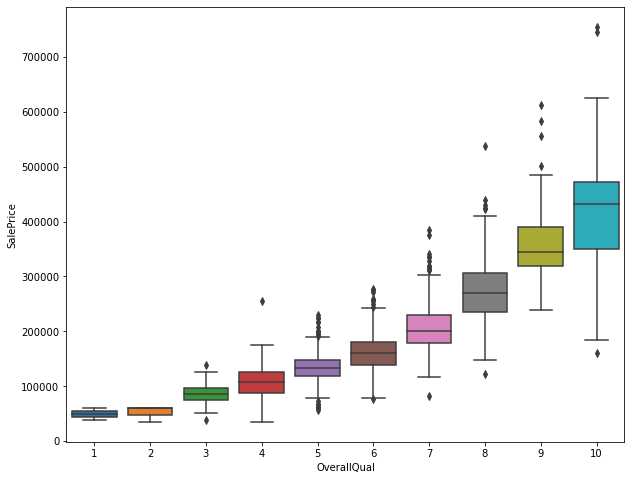

In [19]:
fig = plt.figure(figsize = (10,8))
sns.boxplot('OverallQual', 'SalePrice', data = house)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

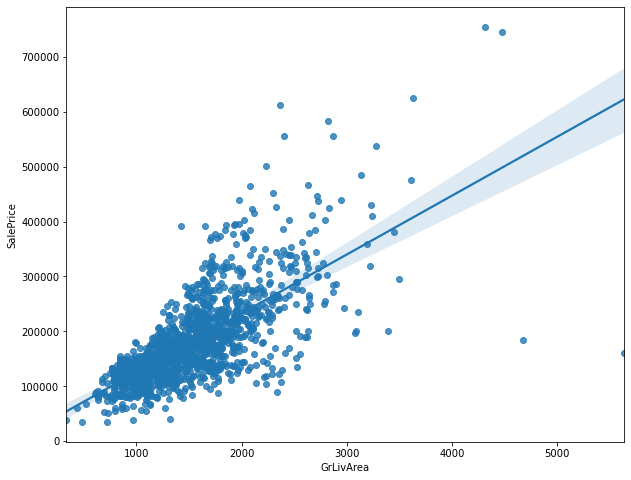

In [20]:
fig = plt.figure(figsize = (10,8))
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = house)

In [21]:
house_ = house
bins = range(330, 5700, 535)
house_['GrLivArea'] = pd.cut(house_['GrLivArea'], bins)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use strippl

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

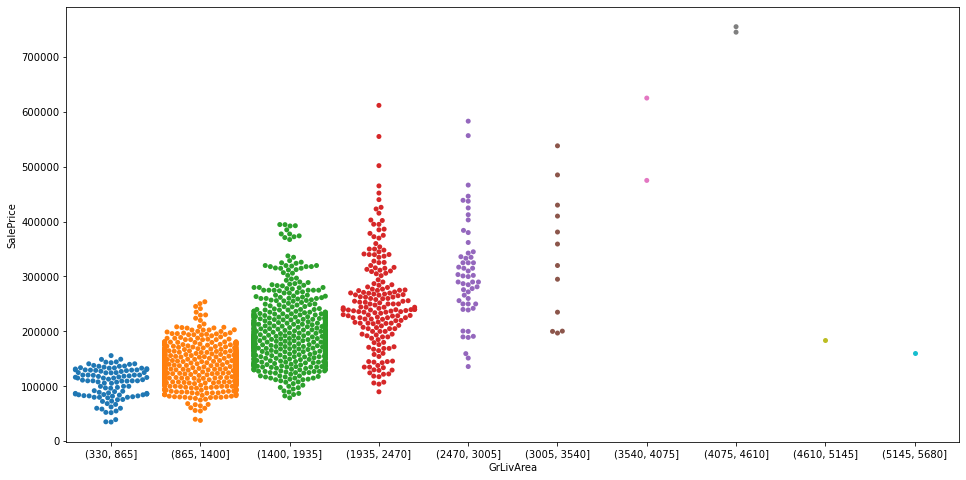

In [22]:
fig = plt.figure(figsize = (16,8))
sns.swarmplot('GrLivArea', 'SalePrice', data = house_)

<AxesSubplot:xlabel='GarageCars'>

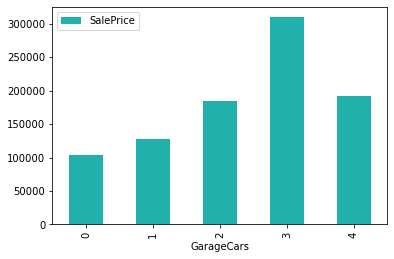

In [23]:
house[['GarageCars', 'SalePrice']].groupby(['GarageCars']).mean().plot.bar(color = 'lightseagreen')

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>

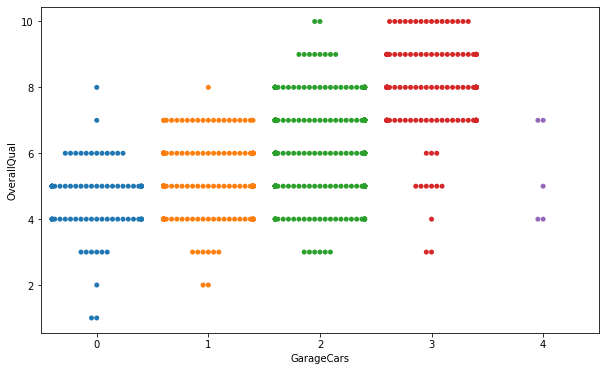

In [24]:
fig = plt.figure(figsize = (10,6))
sns.swarmplot(x = 'GarageCars', y = 'OverallQual', data = house)

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

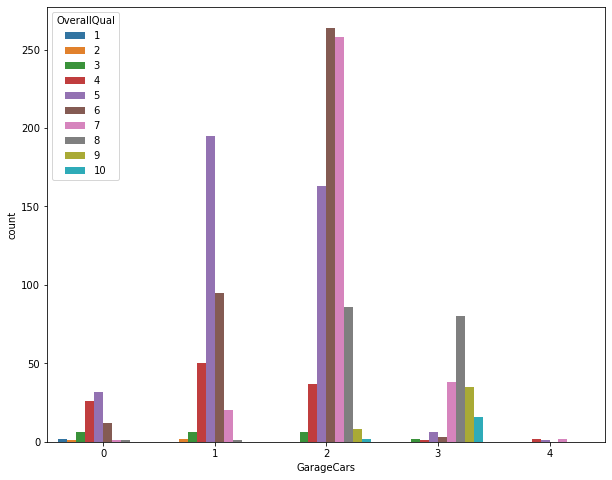

In [25]:
fig = plt.figure(figsize = (10,8))
sns.countplot(x = 'GarageCars', hue = 'OverallQual', data = house)

<AxesSubplot:xlabel='GarageCars'>

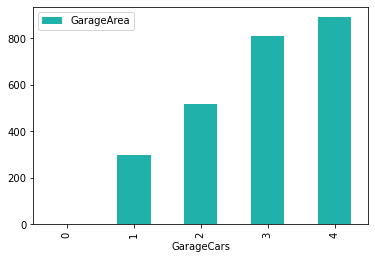

In [30]:
house[['GarageCars', 'GarageArea']].groupby(['GarageCars']).mean().plot.bar(color = 'lightseagreen')

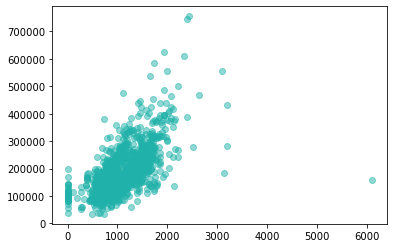

In [28]:
plt.scatter(house['TotalBsmtSF'], house['SalePrice'], color = 'lightseagreen', alpha = 0.5)